# Project: Players rating with time

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook,  <a href=https://www.kaggle.com/hugomathien/soccer?>  European Soccor Database </a>were explored as a part of udaciy advanced data analysis nanodegree, a quick exploration of the database is shown below, you can find more infromation about the database in the database link. 

In [36]:
import matplotlib.ticker as mtick
from sqlite3_util_py import * #this util file contains the imported libraries and some useful functions to explore data base and table

What are the database tables, how many rows and columns in each table? 

In [37]:
desc() 

,table,rows,columns
0,sqlite_sequence,7,2
1,Player_Attributes,183978,42
2,Player,11060,7
3,Match,25979,115
4,League,11,3
5,Country,11,2
6,Team,299,5
7,Team_Attributes,1458,25


Ok we have 7 tables, some tables are very big, player_attribute is an example.

<a id='wrangling'></a>
## Data Wrangling


### General Properties
let us focus on player attributes and create a dataset joining the player attributes and the plyar tables. 

In [38]:
#importing data from sqlite
playerskills = pd.read_sql("""SELECT a.player_api_id,player_name ,date,birthday,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle  FROM Player_Attributes a join player b on a.player_api_id = b.player_api_id  ;""", conn)

In [39]:
playerskills.head()

,player_api_id,player_name,date,birthday,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,1992-02-29 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,505942,Aaron Appindangoye,2015-11-19 00:00:00,1992-02-29 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,505942,Aaron Appindangoye,2015-09-21 00:00:00,1992-02-29 00:00:00,62.0,66.0,49.0,44.0,71.0,61.0,...,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,505942,Aaron Appindangoye,2015-03-20 00:00:00,1992-02-29 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
4,505942,Aaron Appindangoye,2007-02-22 00:00:00,1992-02-29 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0


In [40]:
playerskills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   player_api_id       183978 non-null  int64  
 1   player_name         183978 non-null  object 
 2   date                183978 non-null  object 
 3   birthday            183978 non-null  object 
 4   overall_rating      183142 non-null  float64
 5   potential           183142 non-null  float64
 6   crossing            183142 non-null  float64
 7   finishing           183142 non-null  float64
 8   heading_accuracy    183142 non-null  float64
 9   short_passing       183142 non-null  float64
 10  volleys             181265 non-null  float64
 11  dribbling           183142 non-null  float64
 12  curve               181265 non-null  float64
 13  free_kick_accuracy  183142 non-null  float64
 14  long_passing        183142 non-null  float64
 15  ball_control        183142 non-nul

In [41]:
#Drop NA
playerskills.dropna(inplace= True)

In [42]:
#Fix the dates datetype. 
playerskills[['date','birthday']] = playerskills[['date','birthday']].apply(pd.to_datetime)

Now the data is clean, however, how much history we have for each player (i.e. how many years of rating we have for each player in different ages). We need to compare players who have been consistly rated in different ages 

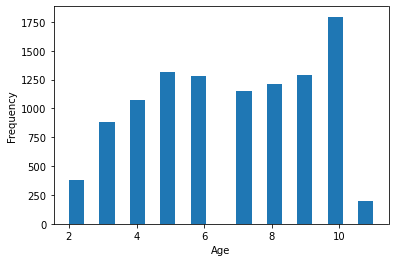

In [43]:
#Creating age column by substracting date of rating vs birthday
playerskills['age'] = (playerskills['date'] - playerskills['birthday']).dt.days // 365
#count the age years we have per plater
player_years = playerskills.groupby([ 'player_name','player_api_id']).nunique()[['age']]
player_years['age'].plot.hist(bins = 20).set_xlabel("Age");

reading the chart more than 3000 players has 9+ years of ratings, that's cool let us work with those players, Also, let's focus on the players ratings between age of 15 and 35 years old. 

In [44]:
#get players with 9 years of history and more
players1 = player_years[player_years['age']>=9].reset_index()['player_api_id']
#get the palyer ratings between 15 and 35 years old
mask = (playerskills['age'] >= 15) & (playerskills['age'] <= 35)

#apply filters
playerskills = playerskills[playerskills['player_api_id'].isin(players1)]
playerskills = playerskills[mask]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [45]:
playerskills.head()

,player_api_id,player_name,date,birthday,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,age
5,155782,Aaron Cresswell,2016-04-21,1989-12-15,74.0,76.0,80.0,53.0,58.0,71.0,...,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,26
6,155782,Aaron Cresswell,2016-04-07,1989-12-15,74.0,76.0,80.0,53.0,58.0,71.0,...,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,26
7,155782,Aaron Cresswell,2016-01-07,1989-12-15,73.0,75.0,79.0,52.0,57.0,70.0,...,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,26
8,155782,Aaron Cresswell,2015-12-24,1989-12-15,73.0,75.0,79.0,51.0,57.0,70.0,...,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,26
9,155782,Aaron Cresswell,2015-12-17,1989-12-15,73.0,75.0,79.0,51.0,57.0,70.0,...,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,26


Text(0, 0.5, 'Rating')

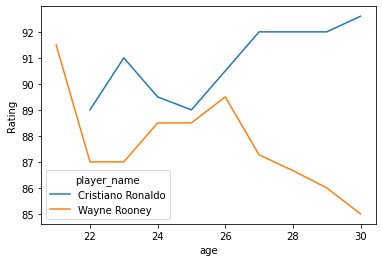

In [46]:
playerskills[playerskills['player_name'].isin(['Wayne Rooney','Cristiano Ronaldo'])].groupby(['age','player_name']).mean().reset_index().pivot(index='age', columns='player_name', values='overall_rating').plot().set_ylabel("Rating")

This is satifying now, this is an example of 2 well-known players ratings in differnent ages, Wayne Roony known as "Golden Boy" rating was about 91.5 in his 21 years old age this decreased with time to 85 in the age of 30, CR7 rating is a bit different he seems to be consistenly increasing with time reaching rating of 92 in his 30. 

<a id='eda'></a>
## Exploratory Data Analysis

The idea behind the analyis is to understand how age affects the player performance. this will help  to better quantify what will be expected from players

### What are the best years for player's performance? 

To answer this question, we need to do further data manupliation
Steps: 

1 - Get the player average rating per age year. 

In [47]:
#Average player rating per age year
average_rating_per_year = playerskills.groupby(['age','player_name','player_api_id']).mean().reset_index()



2 - Get the player average rating in his career. 

In [48]:
#Average player rating 
average_rating = playerskills.drop(columns = 'age').groupby(['player_api_id']).mean().reset_index()


3 - Calculate the change % in rating in every age year vs the player's average rating

In [49]:

arpy = average_rating_per_year.merge(average_rating,suffixes=('_yearly', ''), right_on = 'player_api_id', left_on = 'player_api_id' )

for i in list(average_rating.columns)[1:]: 
    arpy[i + '_change%'] = (100*(arpy[i + '_yearly'] - arpy[i])/arpy[i])


In [50]:
arpy[arpy['player_name'].isin(['Wayne Rooney','Cristiano Ronaldo'])].pivot(index='age', columns='player_name', values='overall_rating_change%')

player_name,Cristiano Ronaldo,Wayne Rooney
age,,
21,NaN,4.904459
22,-2.497809,-0.254777
23,-0.306748,-0.254777
24,-1.950044,1.464968
25,-2.497809,1.464968
26,-0.854514,2.611465
27,0.788782,0.057904
28,0.788782,-0.636943
29,0.788782,-1.401274


Now, let's see the same examples below, wayne rooney was 5% better than his career average rating when he was 21 years old. and 2% lower than his career average rating. However, Cristiano Ronald in his 30 is 2% better than average. 

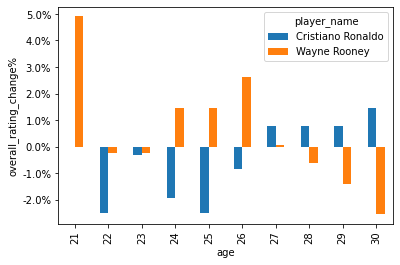

In [62]:
plot = arpy[arpy['player_name'].isin(['Wayne Rooney','Cristiano Ronaldo'])].pivot(index='age', columns='player_name', values='overall_rating_change%').plot.bar()
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.set_ylabel("overall_rating_change%");

Let's now aggregate this data over all the players, to see the change % in rating for every year in the career of the player

1) Scatter plot of change %, every point represent a player in specific age


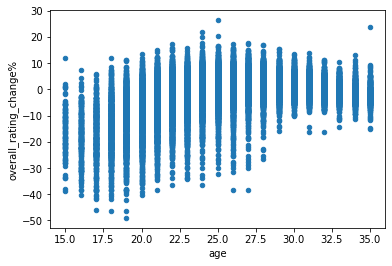

In [63]:
arpy.plot.scatter(x='age',y = 'overall_rating_change%');

Let's build a box-plot for every age year to see the distribution of change % of the players 


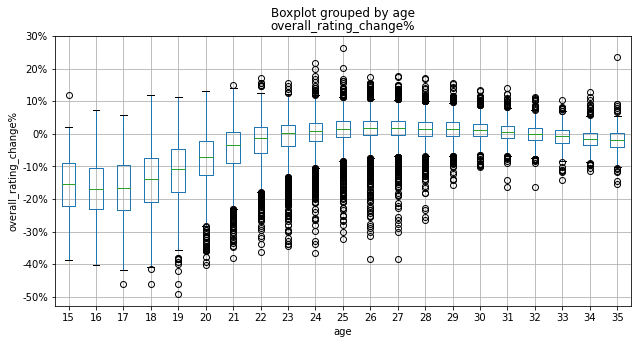

In [64]:
plot = arpy.boxplot(column='overall_rating_change%',by = 'age',figsize=[10,5])
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.set_ylabel("overall_rating_change%");

Finally let's see the mean on change% over age

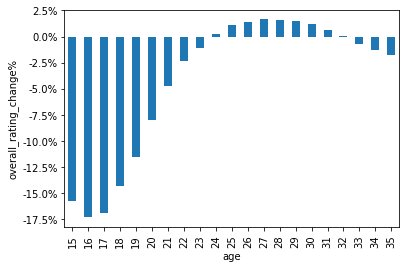

In [65]:
plot = arpy.groupby('age')['overall_rating_change%'].mean().plot.bar()
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.set_ylabel("overall_rating_change%");

Cool!  between 15 and 22 years, seems like players are on average below their rating, this changes between 22 and 31 years while players are in their best performance, after that rating starts to decline

### What are the sweet spot for player's attributes performance? 

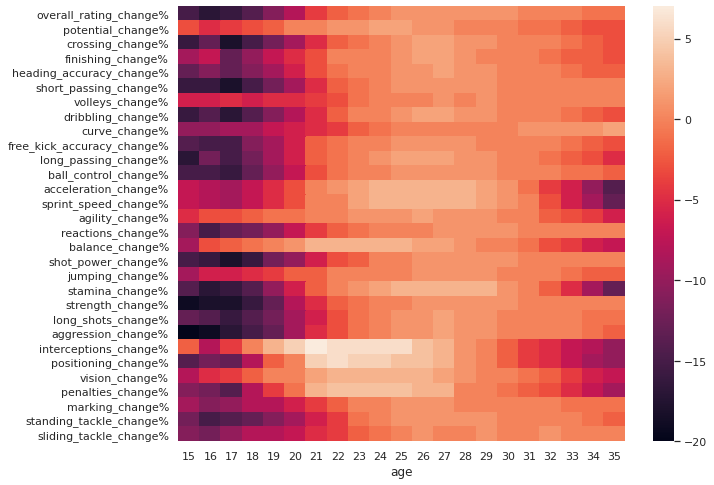

In [74]:
#all what we need to do then is to draw heatmap to show the age vs %change in performance per attribute
import seaborn as sns
sns.set(rc={'figure.figsize':(10
                              ,8)})
sns.heatmap(df, annot=False)
